In [721]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as nb
# import seaborn as sns

In [722]:
df=pd.read_csv("data.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [723]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [725]:

df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [726]:
df.shape[1]

12

Missing data?

In [727]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

NO 

cat column

In [728]:
df.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Outliersss


In [ ]:
threshold = 1.5

# For RestingBP
Q1_bp = df['RestingBP'].quantile(0.25)
Q3_bp = df['RestingBP'].quantile(0.75)
IQR_bp = Q3_bp - Q1_bp

# For Cholesterol
Q1_chol = df['Cholesterol'].quantile(0.25)
Q3_chol = df['Cholesterol'].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol

# For MaxHR
Q1_hr = df['MaxHR'].quantile(0.25)
Q3_hr = df['MaxHR'].quantile(0.75)
IQR_hr = Q3_hr - Q1_hr

# For Oldpeak
Q1_op = df['Oldpeak'].quantile(0.25)
Q3_op = df['Oldpeak'].quantile(0.75)
IQR_op = Q3_op - Q1_op

# Print the bounds for each feature
print("\nBounds for each feature:")
print(f"RestingBP: Lower = {Q1_bp - threshold * IQR_bp:.2f}, Upper = {Q3_bp + threshold * IQR_bp:.2f}")
print(f"Cholesterol: Lower = {Q1_chol - threshold * IQR_chol:.2f}, Upper = {Q3_chol + threshold * IQR_chol:.2f}")
print(f"MaxHR: Lower = {Q1_hr - threshold * IQR_hr:.2f}, Upper = {Q3_hr + threshold * IQR_hr:.2f}")
print(f"Oldpeak: Lower = {Q1_op - threshold * IQR_op:.2f}, Upper = {Q3_op + threshold * IQR_op:.2f}")


Bounds for each feature:
RestingBP: Lower = 90.00, Upper = 170.00
Cholesterol: Lower = 32.62, Upper = 407.62
MaxHR: Lower = 66.00, Upper = 210.00
Oldpeak: Lower = -2.25, Upper = 3.75


In [730]:
# Define thresholds for all features
lower_bound_bp = Q1_bp - threshold * IQR_bp
upper_bound_bp = Q3_bp + threshold * IQR_bp

lower_bound_chol = Q1_chol - threshold * IQR_chol
upper_bound_chol = Q3_chol + threshold * IQR_chol

lower_bound_hr = Q1_hr - threshold * IQR_hr
upper_bound_hr = Q3_hr + threshold * IQR_hr

lower_bound_op = Q1_op - threshold * IQR_op
upper_bound_op = Q3_op + threshold * IQR_op

# Filter out outliers for all features
df_cleaned = df[
    (df['RestingBP'] >= lower_bound_bp) & (df['RestingBP'] <= upper_bound_bp) &
    (df['Cholesterol'] >= lower_bound_chol) & (df['Cholesterol'] <= upper_bound_chol) &
    (df['MaxHR'] >= lower_bound_hr) & (df['MaxHR'] <= upper_bound_hr) &
    (df['Oldpeak'] >= lower_bound_op) & (df['Oldpeak'] <= upper_bound_op)
]

# Check the number of rows before and after dropping outliers
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

Original number of rows: 918
Number of rows after removing outliers: 702


duplicates

In [731]:
df_cleaned.duplicated().sum()

0

In [733]:

from sklearn.preprocessing import StandardScaler



Data encoding and spliting 

In [734]:


dfe = pd.get_dummies(df_cleaned, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])


X = dfe.drop(columns=['HeartDisease'])
y = dfe['HeartDisease']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [735]:
dfe.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


PCA & some visaulization

In [736]:
from sklearn.decomposition import PCA

#  PCA reduce dimension to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y.reset_index(drop=True)


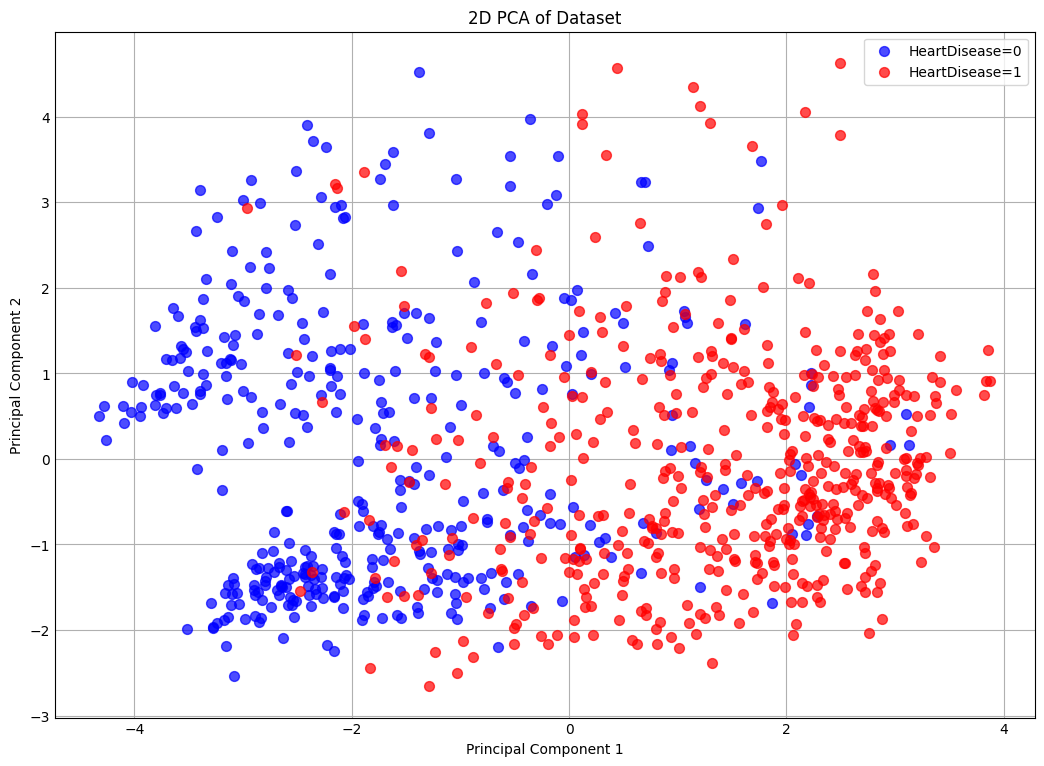

In [737]:
# Visualize the results
plt.figure(figsize=(10, 7))
for label, color in zip([0, 1], ['blue', 'red']):
    subset = pca_df[pca_df['HeartDisease'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'HeartDisease={label}', alpha=0.7, s=50, c=color)

plt.title('2D PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [738]:
# sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df, palette='coolwarm')
# plt.title('PCA of Encoded Dataset')
# plt.show()

In [739]:
# sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df, palette='coolwarm')
# plt.title('PCA of Encoded Dataset')
# plt.show()

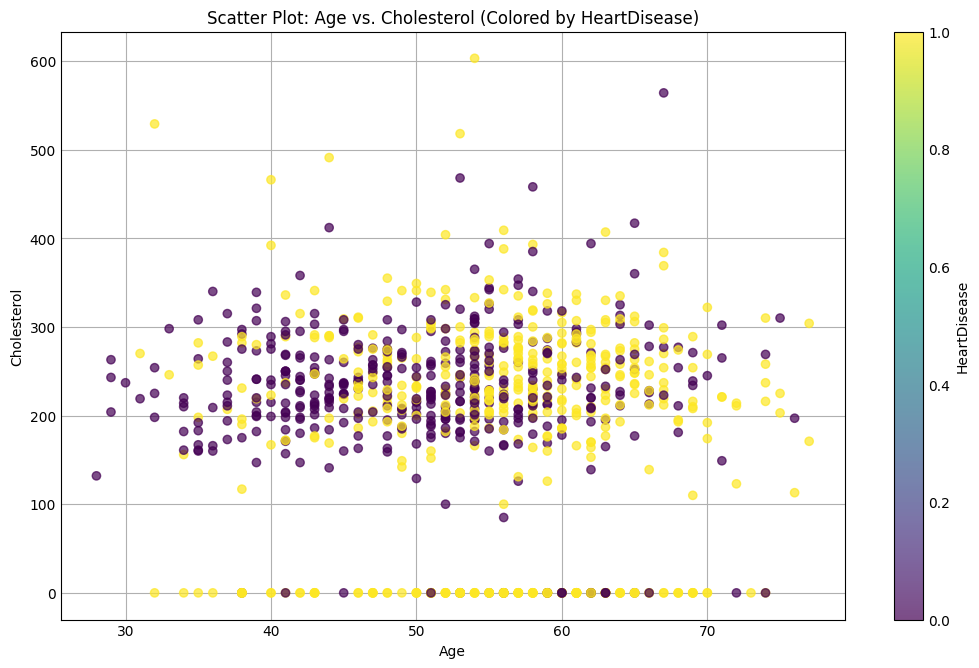

In [740]:
#between Age and Cholesterol
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age'], df_cleaned['Cholesterol'], c=df_cleaned['HeartDisease'], cmap='viridis', alpha=0.7)
plt.colorbar(label='HeartDisease')
plt.title('Scatter Plot: Age vs. Cholesterol (Colored by HeartDisease)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()


/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_65367/2630166856.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([heart_disease_0, heart_disease_1], labels=['No Heart Disease', 'Heart Disease'], patch_artist=True,


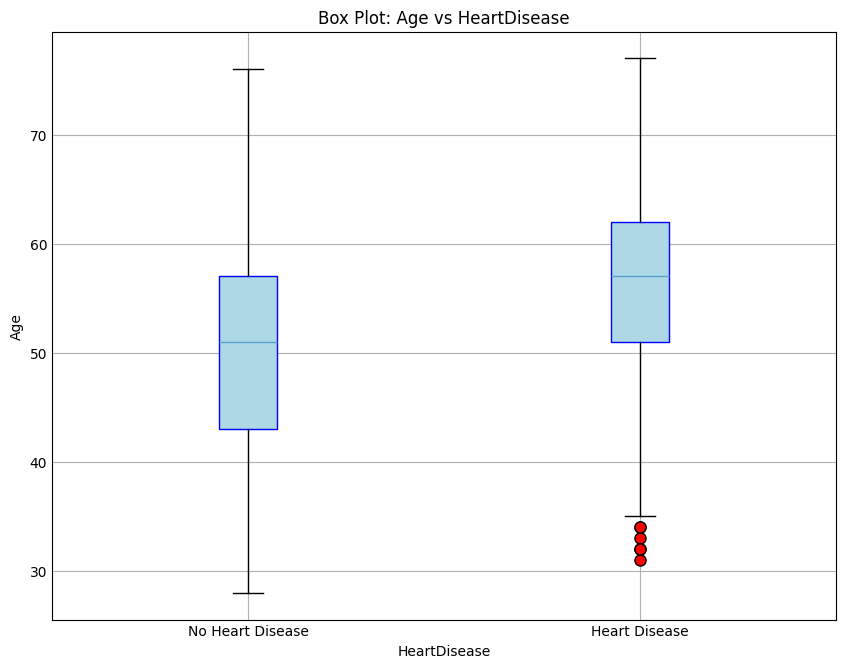

In [741]:


# Data preparation for Boxplot
heart_disease_0 = df[df['HeartDisease'] == 0]['Age']
heart_disease_1 = df[df['HeartDisease'] == 1]['Age']

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([heart_disease_0, heart_disease_1], labels=['No Heart Disease', 'Heart Disease'], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8, markeredgecolor='black'))
plt.title('Box Plot: Age vs HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Age')
plt.grid(True)
plt.show()

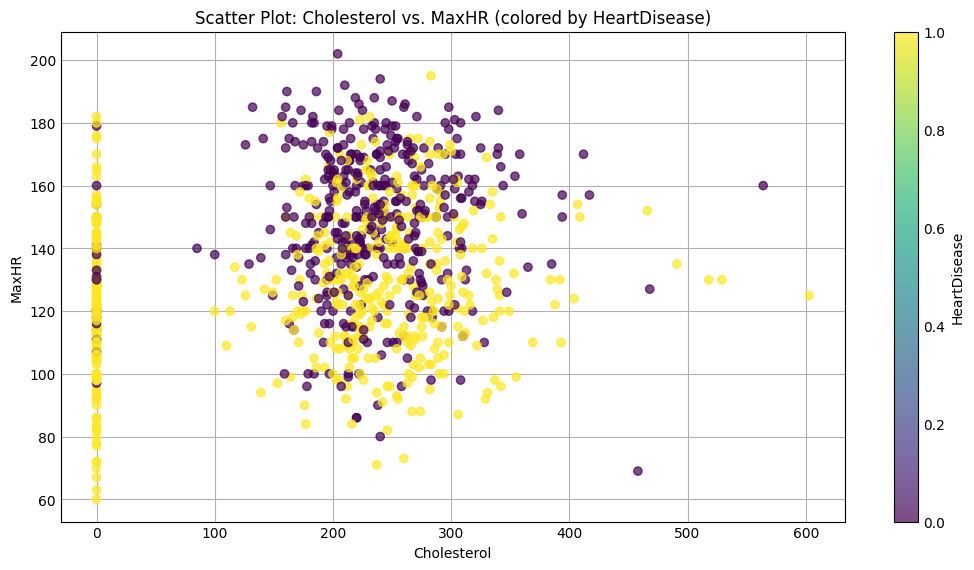

In [742]:
# between Cholesterol and MaxHR (numerical type)
plt.figure(figsize=(10, 5))
plt.scatter(df_cleaned['Cholesterol'], df_cleaned['MaxHR'], c=df_cleaned['HeartDisease'], cmap='viridis', alpha=0.7)
plt.colorbar(label='HeartDisease')
plt.title('Scatter Plot: Cholesterol vs. MaxHR (colored by HeartDisease)')
plt.xlabel('Cholesterol')
plt.ylabel('MaxHR')
plt.grid(True)
plt.show()

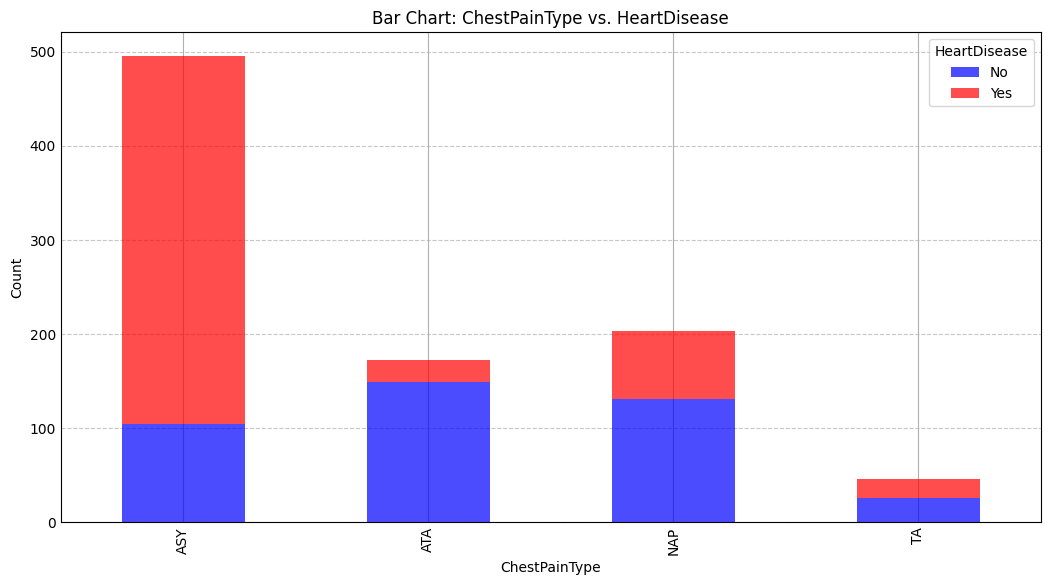

In [743]:
# between ChestPainType and HeartDisease
chest_pain_counts = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack()
chest_pain_counts.plot(kind='bar', stacked=True, figsize=(10, 5), color=['blue', 'red'], alpha=0.7)
plt.title('Bar Chart: ChestPainType vs. HeartDisease')
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.legend(title='HeartDisease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

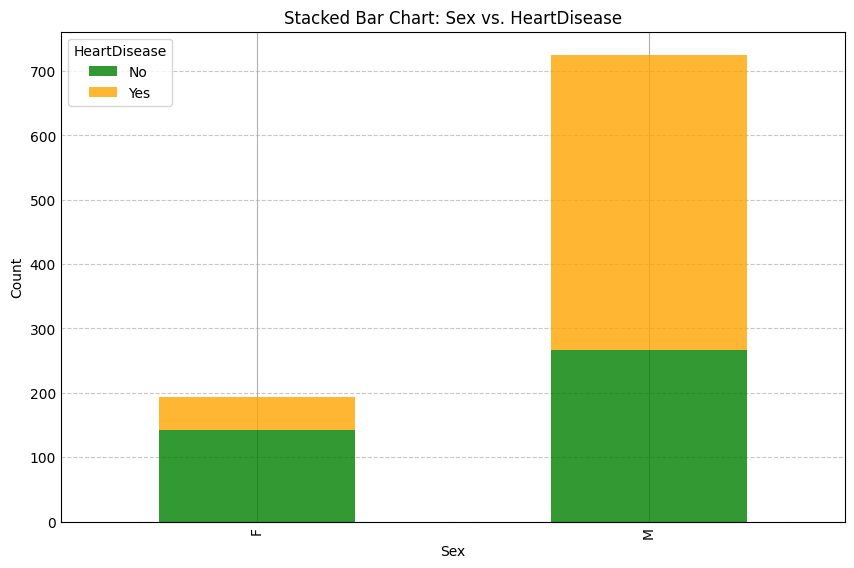

In [744]:
#  between Sex and HeartDisease (categorical type)
sex_counts = df.groupby(['Sex', 'HeartDisease']).size().unstack()
sex_counts.plot(kind='bar', stacked=True, figsize=(8, 5), color=['green', 'orange'], alpha=0.8)
plt.title('Stacked Bar Chart: Sex vs. HeartDisease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='HeartDisease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



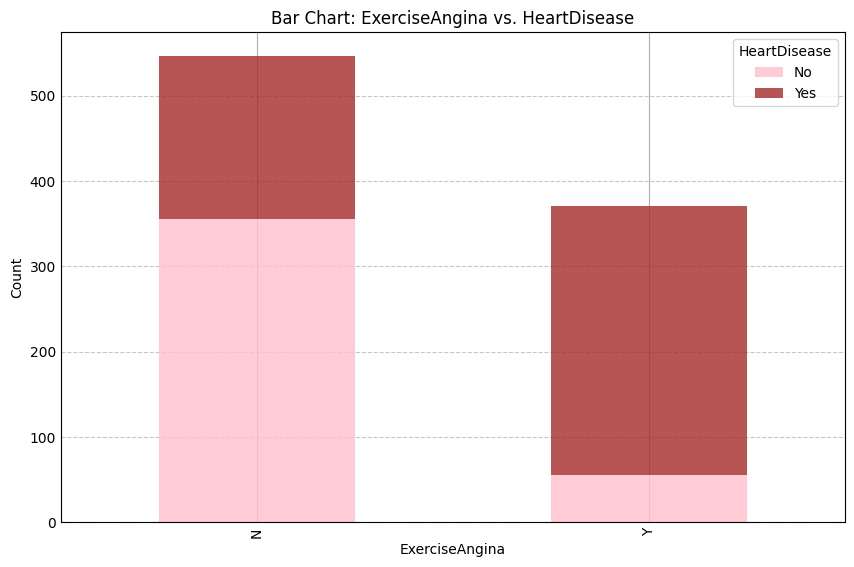

In [745]:
#  ExerciseAngina vs. HeartDisease (categorical type)
exercise_angina_counts = df.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack()
exercise_angina_counts.plot(kind='bar', stacked=True, figsize=(8, 5), color=['pink', 'brown'], alpha=0.8)
plt.title('Bar Chart: ExerciseAngina vs. HeartDisease')
plt.xlabel('ExerciseAngina')
plt.ylabel('Count')
plt.legend(title='HeartDisease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

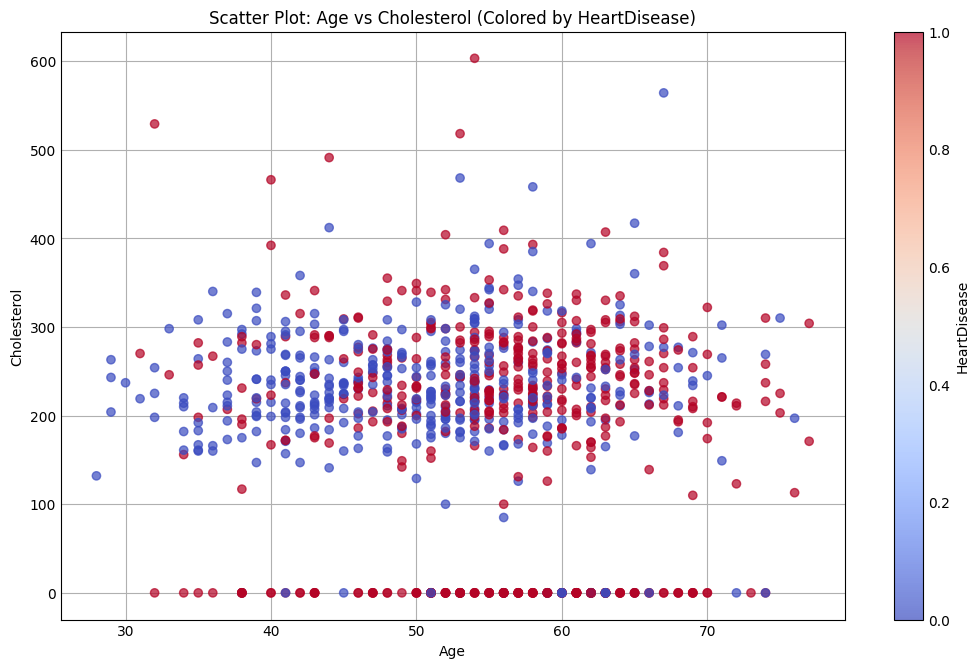

In [746]:
plt.figure(figsize=(10, 6))

# Scatter plot with different colors for HeartDisease
plt.scatter(df['Age'], df['Cholesterol'], c=df['HeartDisease'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='HeartDisease')
plt.title('Scatter Plot: Age vs Cholesterol (Colored by HeartDisease)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

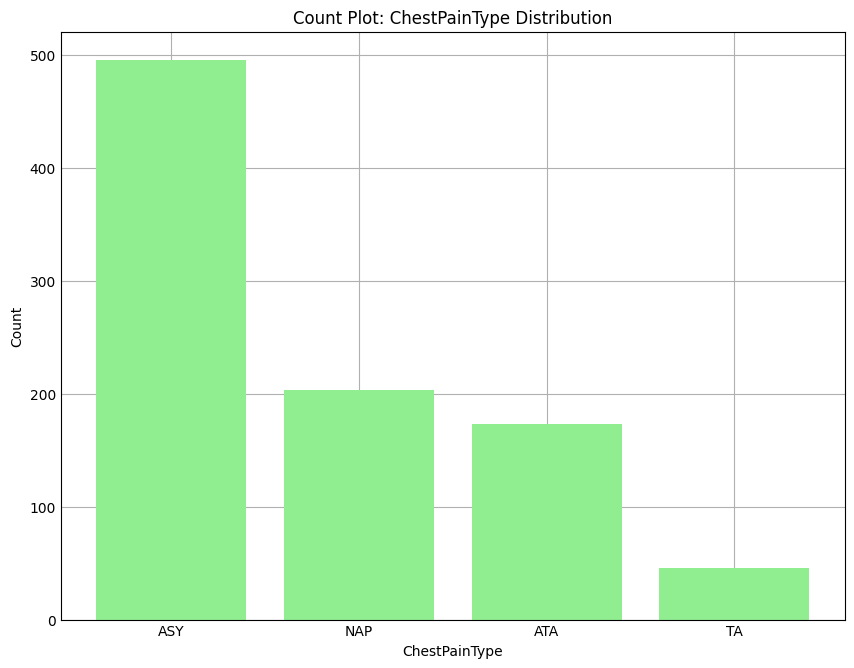

In [747]:
chest_pain_counts = df['ChestPainType'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(chest_pain_counts.index, chest_pain_counts.values, color='lightgreen')
plt.title('Count Plot: ChestPainType Distribution')
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

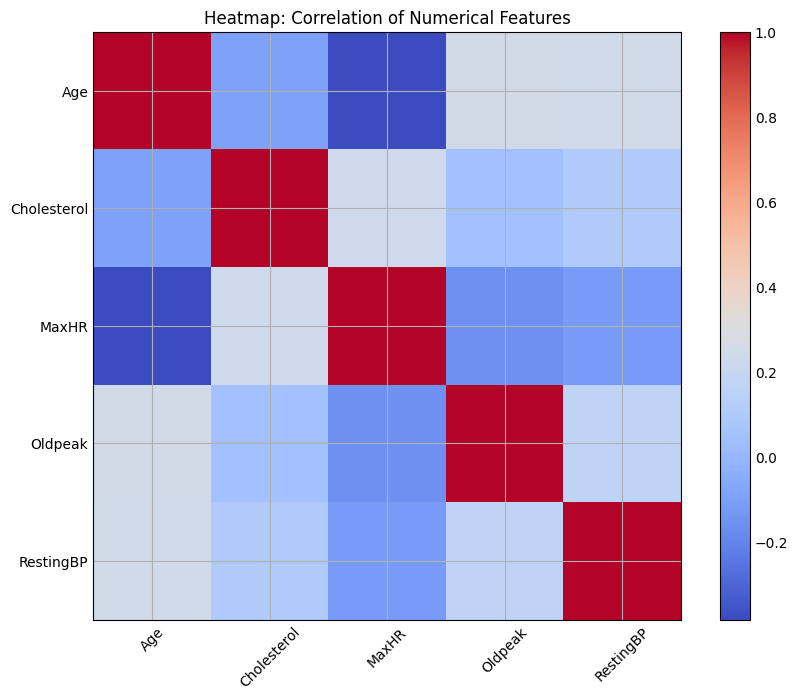

In [748]:
# Calculate correlation matrix for numerical columns
numerical_columns = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
corr_matrix = df[numerical_columns].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Add labels
plt.xticks(nb.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(nb.arange(len(corr_matrix.columns)), corr_matrix.columns)

plt.title('Heatmap: Correlation of Numerical Features')
plt.show()

In [749]:
from sklearn.model_selection import train_test_split
X = dfe.drop(columns='HeartDisease')
y = dfe['HeartDisease']

In [871]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5,stratify=y, random_state=2)
X_val ,X_test, y_val , y_test=train_test_split(X_temp, y_temp, test_size=0.2 , stratify=y_temp, random_state=2)


In [872]:
len(X_train)

459

In [873]:
len(X_temp)

459

In [874]:
len(X_test)

92

SVM


In [875]:
from sklearn.svm import SVC 
model = SVC()


In [876]:
model.fit(X_train, y_train,)

SVC()

In [877]:
model.score(X_test, y_test)


0.8369565217391305

In [878]:
model.score(X_val, y_val)

0.7166212534059946

In [879]:
model.score(X_train, y_train)

0.7124183006535948

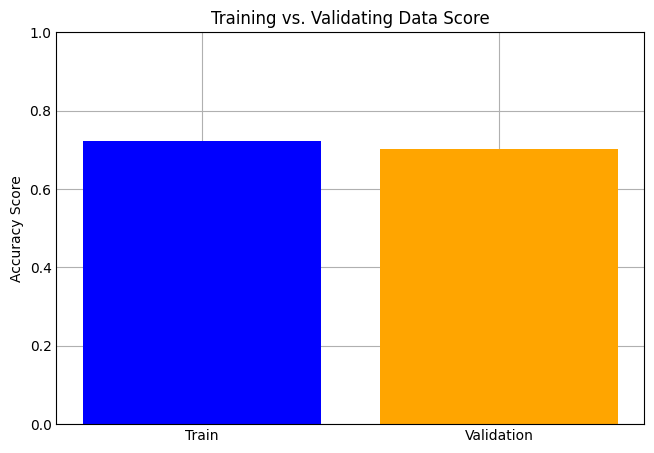

In [834]:

train_score = model.score(X_train, y_train)  # Training score
val_score = model.score(X_val, y_val)    # Test score

# Plotting the training and test scores
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_score, test_score], color=['blue', 'orange'])
plt.title('Training vs. Validating Data Score')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Since accuracy ranges from 0 to 1
plt.show()


In [811]:
model_C = SVC(C=10) # C hena hyperparameter
model_C.fit(X_train, y_train)
print(model_C.score(X_test, y_test))
print(model_C.score(X_train, y_train))

0.75
0.7461059190031153


In [880]:
model_C = SVC(C=14) # C hena hyperparameter
model_C.fit(X_train, y_train)
print(model_C.score(X_test, y_test))
print(model_C.score(X_train, y_train))

0.8478260869565217
0.738562091503268


In [881]:
model_linear_kernal = SVC(kernel="rbf")
model_linear_kernal.fit(X_train, y_train)

SVC()

In [882]:
model_linear_kernal.score(X_test, y_test)

0.8369565217391305

In [883]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [884]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [885]:
conf_matrix = confusion_matrix(y_test,y_pred)

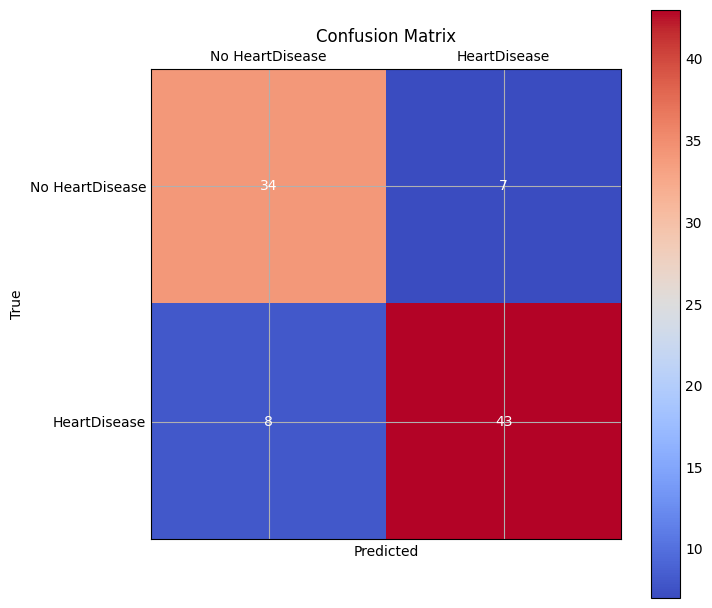

In [886]:

fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(conf_matrix, cmap="coolwarm")  # Using 'coolwarm' colormap for better visual
fig.colorbar(cax)

ax.set_xticks(nb.arange(2))
ax.set_yticks(nb.arange(2))
ax.set_xticklabels(['No HeartDisease', 'HeartDisease'])
ax.set_yticklabels(['No HeartDisease', 'HeartDisease'])


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Annotate the matrix with counts
for (i, j), value in nb.ndenumerate(conf_matrix):
    ax.text(j, i, str(value), ha='center', va='center', color='white')

plt.show()


precision

In [887]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


report = classification_report(y_test, y_pred, target_names=["No HeartDisease", "HeartDisease"])
print(report)

Precision: 0.8600
Recall: 0.8431
F1-Score: 0.8515
                 precision    recall  f1-score   support

No HeartDisease       0.81      0.83      0.82        41
   HeartDisease       0.86      0.84      0.85        51

       accuracy                           0.84        92
      macro avg       0.83      0.84      0.84        92
   weighted avg       0.84      0.84      0.84        92



In [888]:
from sklearn.naive_bayes import GaussianNB # binary classification 
modelB = GaussianNB()

In [889]:
modelB.fit(X_train,y_train)

GaussianNB()

In [890]:
modelB.score(X_test,y_test)

0.9130434782608695

In [891]:
modelB.score(X_train,y_train)

0.8671023965141612

In [892]:
modelB.score(X_val,y_val)

0.8555858310626703

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=10) 
# msh lazem

array([0.89090909, 0.92727273, 0.83636364, 0.87272727, 0.87272727,
       0.85454545, 0.87272727, 0.81818182, 0.85454545, 0.76363636])